In [1]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [59]:
import pandas as pd
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)

In [4]:
import numpy as np

In [38]:
def get_numpy_data(data_frame, features, output):
    data_frame['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    feature_matrix = np.array(data_frame[features])
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_array = np.array(data_frame[output])
    return(feature_matrix, output_array)

In [27]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [97]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant:
        derivative = 2*sum(errors*feature)
    else:
        derivative = 2*sum(errors*feature) + 2*l2_penalty*weight
    return derivative

In [39]:
data_frame = sales
features = ['sqft_living']
output = 'price'
data_frame['constant'] = 1
features = ['constant'] + features
features_frame = data_frame[features]
output_array = data_frame[output]
output_array.head(2)


0    221900.0
1    538000.0
Name: price, dtype: float64

In [53]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
print(example_features.shape)
print(example_output.shape)
feature = example_features[:,1]
weight = my_weights[1]
l2_penalty = 1
feature_is_constant = False
errors = test_predictions - example_output # prediction errors
print(sum(errors*feature))
# derivative = 2*sum[errors*[feature]] + 2*l2_penalty*weight

(21613L, 2L)
(21613L,)
-2.8277083408e+13


In [69]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors
print(errors.shape)
print(test_predictions.shape)
print(example_features.shape)
# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.
print(my_weights.shape)

(21613L,)
(21613L,)
(21613L, 2L)
-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0
(2L,)


In [56]:
for i in xrange(5):
    print(i)

0
1
2
3
4


In [104]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    num_iter = 0
    #while not reached maximum number of iterations:
    while num_iter < max_iterations:
        # compute the predictions using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
            # subtract the step size times the derivative from the current weight  
            weights[i] = weights[i] - step_size * derivative
        num_iter += 1
    return weights

In [124]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [125]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(simple_feature_matrix.shape[1])
l2_penalty = 0
weights = np.array(initial_weights)
num_iter = 0
print(num_iter < max_iterations)
predictions = predict_output(simple_feature_matrix, weights)
errors = predictions - output
print(simple_feature_matrix.shape)
print(errors.shape)
print(example_features[:,i].shape)
xrange(len(weights))
i=0
derivative = feature_derivative_ridge(errors, simple_feature_matrix[:,i], my_weights[i], 1, True)
print(derivative)

True
(17384L, 2L)
(17384L,)
(21613L,)
-18752698920.0


In [126]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [127]:
print(simple_weights_0_penalty)

[ -1.63113515e-01   2.63024369e+02]


In [128]:
l2_penalty = 1e11
print(l2_penalty)
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

1e+11


In [129]:
print(simple_weights_high_penalty)

[   9.76730382  124.57217567]


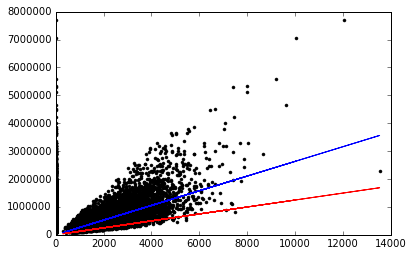

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [132]:
predictions = predict_output(simple_test_feature_matrix, [0,0])
errors = predictions - test_output
print(sum(errors**2))
predictions = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
errors = predictions - test_output
print(sum(errors**2))
predictions = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
errors = predictions - test_output
print(sum(errors**2))

1.78427328614e+15
2.75723632154e+14
6.9464210149e+14


In [118]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [120]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(feature_matrix.shape[1])
l2_penalty = 0
print(l2_penalty)
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print(multiple_weights_0_penalty)

0
[  -0.35743483  243.05416982   22.41481497]


In [121]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(feature_matrix.shape[1])
l2_penalty = 1e11
print(l2_penalty)
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print(multiple_weights_high_penalty)

1e+11
[  6.74296579  91.48927365  78.43658766]


In [135]:
predictions = predict_output(test_feature_matrix, [0,0,0])
errors = predictions - test_output
print(sum(errors**2))
predictions = predict_output(test_feature_matrix, multiple_weights_0_penalty)
errors = predictions - test_output
print(errors[0])
print(sum(errors**2))
predictions = predict_output(test_feature_matrix, multiple_weights_high_penalty)
errors = predictions - test_output
print(errors[0])
print(sum(errors**2))

1.78427328614e+15
77465.4760582
2.74067615919e+14
-39546.4696781
5.00404800501e+14
